In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report
import lightgbm as lgb

train = pd.read_csv('train.csv')
train.head()
test = pd.read_csv('test.csv')
test.head()

features = train.columns.tolist()[1:-1]
X = train[features]
y = train['label']
genre_encoding = {
    'blues': 0,
    'classical': 1,
    'country': 2,
    'disco': 3,
    'hiphop': 4,
    'jazz': 5,
    'metal': 6,
    'pop': 7,
    'reggae': 8,
    'rock': 9
}

# Encode the genres into numerical values
encoded_genres = [genre_encoding[genre] for genre in y]
X_train = train[features]
print(X_train)
y_train = encoded_genres

X_test = test[features]
ground_truth = pd.read_csv('ground_truth.csv')
actual_y = ground_truth['label']

lgb_classifier = lgb.LGBMClassifier(n_estimators=250, random_state=42)
lgb_classifier.fit(X_train, y_train)
y_pred = lgb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(actual_y, y_pred)
report = classification_report(actual_y,y_pred)
print(f"Accur acy:   {accuracy}")
print(report)


      length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0      66149          0.464264         0.079744  0.228116  0.007791   
1      66149          0.254604         0.090115  0.075960  0.002236   
2      66149          0.488070         0.065943  0.119709  0.001558   
3      66149          0.440747         0.071972  0.108535  0.001491   
4      66149          0.369718         0.090648  0.052010  0.000124   
...      ...               ...              ...       ...       ...   
8986   66149          0.462670         0.095231  0.193568  0.019747   
8987   66149          0.173276         0.085205  0.024984  0.000277   
8988   66149          0.291293         0.088386  0.149195  0.001361   
8989   66149          0.249859         0.089284  0.130065  0.003803   
8990   66149          0.332883         0.092598  0.100225  0.001413   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                2156.231325           3.334553e+05              22

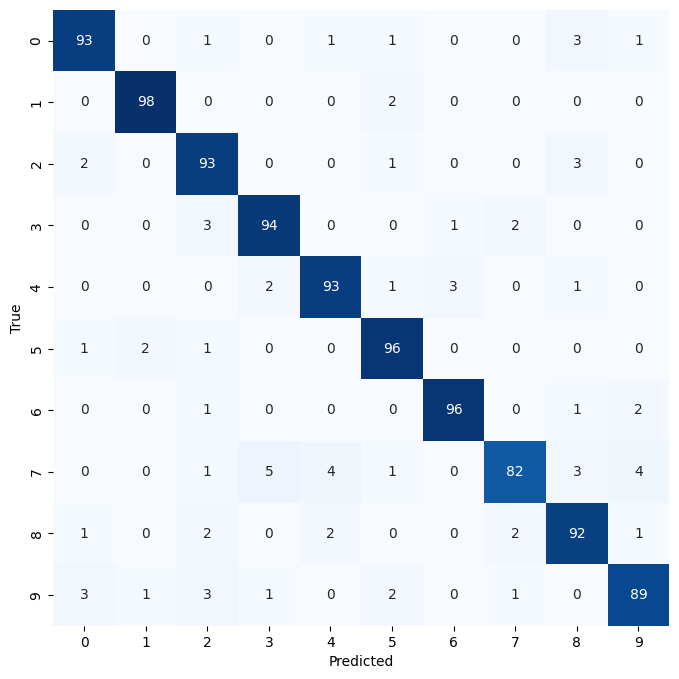

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(actual_y, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', square=True, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()